# Setup figures
This notebook makes the figures illustrating the setup of our RGB runs.

Works on PPMstar.org with jupyterlab3.

In [1]:
%pylab ipympl
from scipy import interpolate
from scipy import optimize
from nugridpy import astronomy as ast
from nugridpy import mesa as ms
from nugridpy import ascii_table
from scipy.signal import savgol_filter
import sys
sys.path.insert(0,'/home/user/user/niagara_scratch_sblouin/PyPPM')
from ppmpy import ppmsetup as ps
from ppmpy import ppm
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)
from astropy import constants as c
from scipy import interpolate
from scipy import integrate
import matplotlib.font_manager
msun = c.M_sun
msun = msun.to('g')
msun = msun.value

Populating the interactive namespace from numpy and matplotlib


In [2]:
ddir = '/user/scratch14_outreach/Pavel/work_low_mass_mesa_7624/LOGS_m1.2_fehm0.3_KipTH667_PreFlash'
mesa_data_dir=ddir

## Kippenhahn plot

In [3]:
matplotlib.rcParams.update({'font.size': 12})

Using old history.datasa file ...
 reading ...100% 

 creating color map1 ...100% 

 creating color map mix ...100% 

engenstyle was  twozone
mixstyle was  twozone

 finished preparing color map
plot versus time left
plotting contours
plotting patches
plotting abund boundaries


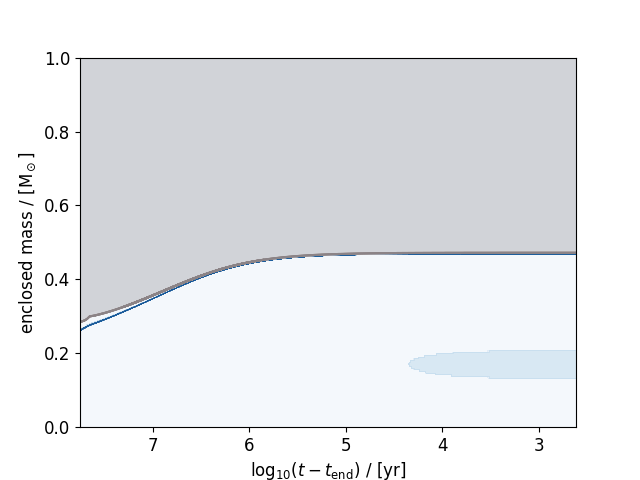

54 in profiles.index file ...
Found and load nearest profile for cycle 2400
reading profile/user/scratch14_outreach/Pavel/work_low_mass_mesa_7624/LOGS_m1.2_fehm0.3_KipTH667_PreFlash/profile3.data ...
 reading ...85%

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


 reading ...100% 

Closing profile tool ...
54 in profiles.index file ...
Found and load nearest profile for cycle 12400
reading profile/user/scratch14_outreach/Pavel/work_low_mass_mesa_7624/LOGS_m1.2_fehm0.3_KipTH667_PreFlash/profile53.data ...
 reading ...75%

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


 reading ...100% 

Closing profile tool ...


In [7]:
ifig=79;close(ifig);figure(ifig)
hh = ms.star_log(ddir)
#hh = ms.star_log('/user/scratch14_outreach/Pavel/work_low_mass_mesa_7624/LOGS_m1.2_fehm0.3_nomix')
hh.kip_cont(ifig=ifig,modstart=0, modstop=15000, ylims=[0.0, 1.],fsize=12,
            yres=10000,xres=10000,ixaxis='log_time_left')

# mc2400
time = log10(hh.get('star_age')[-1]-hh.get('star_age'))
xx = interp(2400, hh.get('model_number'), time)
vlines(xx,0,20,lw=0.75,color='k',ls='--')
mprof=ms.mesa_profile(ddir,num=2400)
radius_mesa = mprof.get('radius')
mass_mesa = mprof.get('mass')
radius_mesa_code = radius_mesa*6.957e10/1e8
mplot = mass_mesa[(radius_mesa_code<=900)&(radius_mesa_code>=38)]
vlines(xx,min(mplot),max(mplot),lw=2,color='k',ls='-')

# mc12400
time = log10(hh.get('star_age')[-1]-hh.get('star_age'))
xx = interp(12400, hh.get('model_number'), time)
vlines(xx,0,20,lw=0.75,color='k',ls='--')
mprof=ms.mesa_profile(ddir,num=12400)
radius_mesa = mprof.get('radius')
mass_mesa = mprof.get('mass')
radius_mesa_code = radius_mesa*6.957e10/1e8
mplot = mass_mesa[(radius_mesa_code<=900)&(radius_mesa_code>=38)]
vlines(xx,min(mplot),max(mplot),lw=2,color='k',ls='-')

text(7.49,0.38,'Bump setup',rotation=270,va='center')
text(4.52,0.38,'Tip setup',rotation=270,va='center')
ylim(0.25,0.48)
ylabel('Enclosed mass ($M_{\odot}$)')
text(7.35,0.46,'Convective envelope', color='dimgray')
text(7.075,0.33,'H-burning shell', color='#1b5b9a', rotation=55)
text(7.1,0.27,'He inner core', color='cornflowerblue')
yticks([0.25,0.3,0.35,0.4,0.45])
ax = plt.gca()
ax.tick_params(axis='both',direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
xlim(None,4)
xlabel('Time to tip of RGB (log yr)')
savefig('kip.pdf', bbox_inches='tight')

## HR diagram

Using old history.datasa file ...
 reading ...100% 

Using old history.datasa file ...
 reading ...100% 

Closing history.data  tool ...


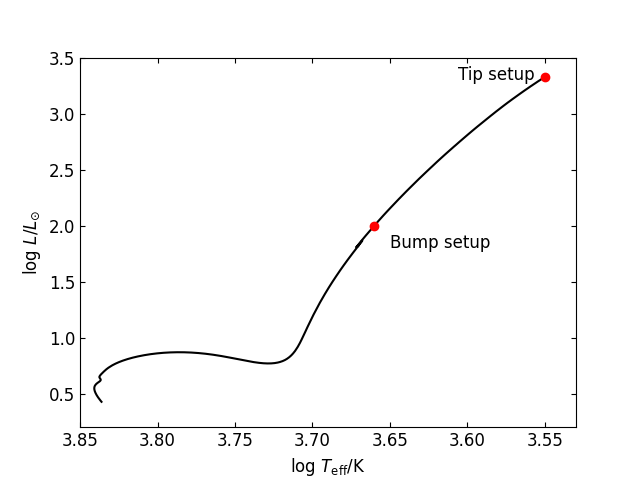

In [8]:
ifig=67;close(ifig);figure(ifig)

g_sun = c.M_sun*c.G/(c.R_sun**2)
g_sun = g_sun.to('cm/s^2')
Teff_sun = 5778

# Plot ZAMS to bump
hist = ms.star_log('/user/scratch14_outreach/Pavel/work_low_mass_mesa_7624/LOGS_m1.2_fehm0.3_nomix')
mod_number = hist.get('model_number')
star_age = hist.get('star_age')
log_Teff = hist.get('log_Teff')
log_L = hist.get('log_L')
log_g = hist.get('log_g')
XH = hist.get('center_h1')
mask = XH<XH[0]*0.99
plot(log_Teff[mask],log_L[mask],'-k')

# Plot RGB up to flash
hist = ms.star_log(ddir)
mod_number = hist.get('model_number')
star_age = hist.get('star_age')
log_Teff = hist.get('log_Teff')
log_L = hist.get('log_L')
log_g = hist.get('log_g')
model_age = star_age[mod_number==12400][0]

plot(log_Teff,log_L,'-k')
plot(log_Teff[mod_number==2400],log_L[mod_number==2400],'o',
    label='Bump setup',color='r')
plot(log_Teff[mod_number==12400],log_L[mod_number==12400],'o',
    label='Tip setup',color='r')
text(3.65,1.8,'Bump setup')
text(3.606,3.3,'Tip setup')
#legend(frameon=False)
xlim(3.85,3.53)
ylim(0.2,3.5)
ylabel(r'$\log\,\,L/L_{\odot} $')
xlabel(r'$\log\,\,T_\mathrm{eff}/{\rm K}$')
ax = plt.gca()
ax.tick_params(axis='both',direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
savefig('HR.pdf', bbox_inches='tight')

## BV figure

FileNotFoundError: [Errno 2] No such file or directory: '/user/scratch14_outreach/Pavel/work_low_mass_mesa_7624/LOGS_m1.2_fehm0.3_KipTH667_PreFlash/profiles.index'

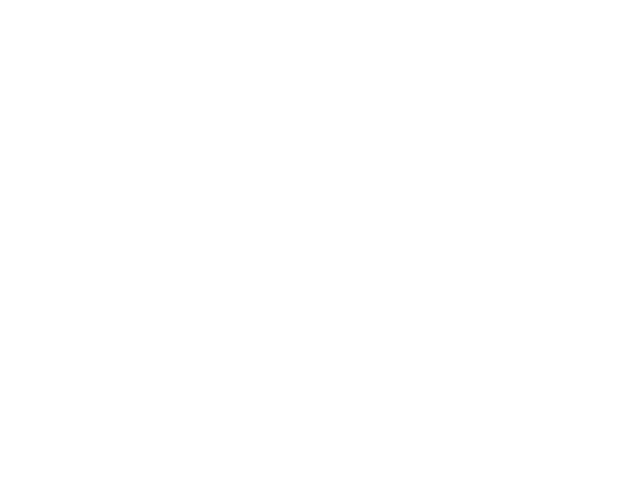

In [4]:
close(222);figure(222)
import os

model = 12400
mprof=ms.mesa_profile(ddir,num=model)
bnu = mprof.get('brunt_nu')
radius_mesa_code = mprof.get('radius')*6.957e10/1e8
semilogy(radius_mesa_code,bnu,'-k',label='MESA')

model = 2400
mprof=ms.mesa_profile(ddir,num=model)
bnu = mprof.get('brunt_nu')
radius_mesa_code = mprof.get('radius')*6.957e10/1e8
semilogy(radius_mesa_code,bnu,'-k')

data_dir = '/home/user/user/niagara_scratch_fherwig/'
run_dir = 'X24-1xL-1xK-heating-768-mc12400-rin40-P0fix-kappamod'
rprof_dir = os.path.join(data_dir,run_dir,'prfs')
rprof = ppm.RprofSet(rprof_dir)
N = 1e6*sqrt(rprof.compute_N2(0))/2/np.pi
R = rprof.get('R',0)
semilogy(R,N,'--r',label="PPMstar base state")

run_dir = 'X14-1000xL-1000xK-heating-768-mc2400-rin40'
rprof_dir = os.path.join(data_dir,run_dir,'prfs')
rprof = ppm.RprofSet(rprof_dir)
N = 1e6*sqrt(rprof.compute_N2(0))/2/np.pi
R = rprof.get('R',0)
semilogy(R,N,'--r')

xlabel('$R$ (Mm)')
ylabel('$N/2\pi$ ($\mu$Hz)')

text(400,70,'Tip setup',rotation=-30)
text(250,40,'Bump setup',rotation=-30)

legend(frameon=False)
xlim(40,900)
ylim(5,3000)
ax = plt.gca()
ax.tick_params(axis='both',direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
savefig('Nbase.pdf', bbox_inches='tight')